In [ ]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.Classification.models_classification as modl

import numpy as np
import pandas as pd
# Example


Transition matrix (rows sum to 1):
[[0.98708227 0.01291773]
 [0.04166358 0.95833642]]
Model converged: True
Converged in 40 iterations (tol = 0.01 )
State means: [ 0.00071555 -0.00128752]
State stds:  [0.00636463 0.0172233 ]
Bull state: 0, Bear state: 1


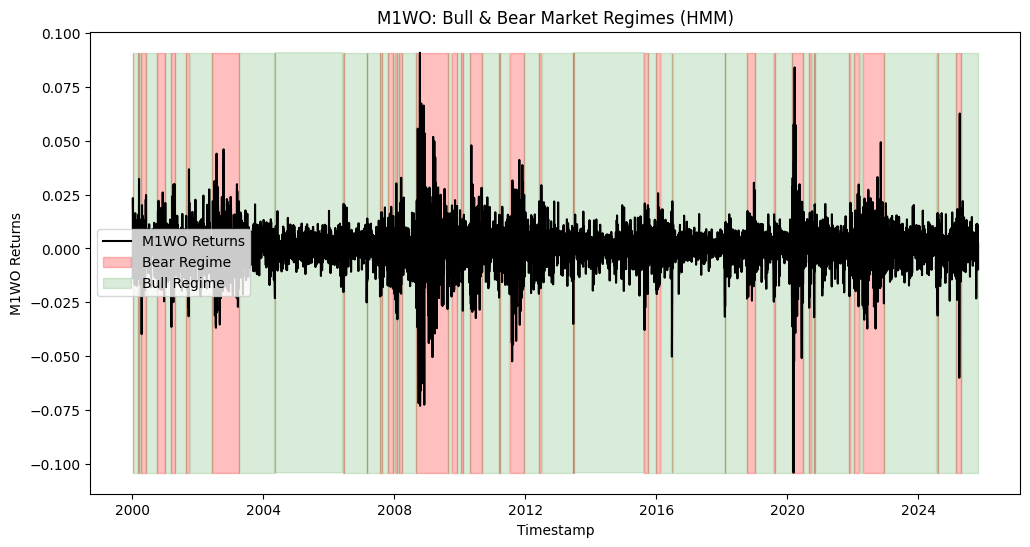

In [2]:
df = dp.create_classification_data(quiet=False)

In [3]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=30,      # fit monthly (approx 30 trading days)
    model="logit",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  

[logit] refit at 2007-01-01 using data up to 2006-12-29
[logit] refit at 2007-02-12 using data up to 2007-02-09
[logit] refit at 2007-03-26 using data up to 2007-03-23
[logit] refit at 2007-05-07 using data up to 2007-05-04
[logit] refit at 2007-06-18 using data up to 2007-06-15
[logit] refit at 2007-07-30 using data up to 2007-07-27
[logit] refit at 2007-09-10 using data up to 2007-09-07
[logit] refit at 2007-10-22 using data up to 2007-10-19
[logit] refit at 2007-12-03 using data up to 2007-11-30
[logit] refit at 2008-01-14 using data up to 2008-01-11
[logit] refit at 2008-02-25 using data up to 2008-02-22
[logit] refit at 2008-04-07 using data up to 2008-04-04
[logit] refit at 2008-05-19 using data up to 2008-05-16
[logit] refit at 2008-06-30 using data up to 2008-06-27
[logit] refit at 2008-08-11 using data up to 2008-08-08
[logit] refit at 2008-09-22 using data up to 2008-09-19
[logit] refit at 2008-11-03 using data up to 2008-10-31
[logit] refit at 2008-12-15 using data up to 200

In [7]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=30,      # fit monthly (approx 30 trading days)
    model="majority",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")

[majority] refit at 2007-01-01 using data up to 2006-12-29
[majority] refit at 2007-02-12 using data up to 2007-02-09
[majority] refit at 2007-03-26 using data up to 2007-03-23
[majority] refit at 2007-05-07 using data up to 2007-05-04
[majority] refit at 2007-06-18 using data up to 2007-06-15
[majority] refit at 2007-07-30 using data up to 2007-07-27
[majority] refit at 2007-09-10 using data up to 2007-09-07
[majority] refit at 2007-10-22 using data up to 2007-10-19
[majority] refit at 2007-12-03 using data up to 2007-11-30
[majority] refit at 2008-01-14 using data up to 2008-01-11
[majority] refit at 2008-02-25 using data up to 2008-02-22
[majority] refit at 2008-04-07 using data up to 2008-04-04
[majority] refit at 2008-05-19 using data up to 2008-05-16
[majority] refit at 2008-06-30 using data up to 2008-06-27
[majority] refit at 2008-08-11 using data up to 2008-08-08
[majority] refit at 2008-09-22 using data up to 2008-09-19
[majority] refit at 2008-11-03 using data up to 2008-10-

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=30,      # fit monthly (approx 30 trading days)
    model="majority",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")

In [11]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=300,      # fit monthly (approx 30 trading days)
    model="rf",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")

[rf] refit at 2007-01-01 using data up to 2006-12-29
[rf] refit at 2008-02-25 using data up to 2008-02-22
[rf] refit at 2009-04-20 using data up to 2009-04-17
[rf] refit at 2010-06-14 using data up to 2010-06-11
[rf] refit at 2011-08-08 using data up to 2011-08-05
[rf] refit at 2012-10-01 using data up to 2012-09-28
[rf] refit at 2013-11-25 using data up to 2013-11-22
[rf] refit at 2015-01-19 using data up to 2015-01-16
[rf] refit at 2016-03-14 using data up to 2016-03-11
[rf] refit at 2017-05-08 using data up to 2017-05-05
[rf] refit at 2018-07-02 using data up to 2018-06-29
[rf] refit at 2019-08-26 using data up to 2019-08-23
[rf] refit at 2020-10-19 using data up to 2020-10-16
[rf] refit at 2021-12-13 using data up to 2021-12-10
[rf] refit at 2023-02-06 using data up to 2023-02-03
[rf] refit at 2024-04-01 using data up to 2024-03-29
[rf] refit at 2025-05-26 using data up to 2025-05-23
Accuracy: 0.8639
Precision: 0.7364
Recall: 0.6943
F1 Score: 0.7147


In [14]:
from importlib import reload
reload(modl)

<module 'source.Classification.models_classification' from '/Users/kilianrunnwerth/Masterarbeit/source/Classification/models_classification.py'>

In [15]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=300,      # fit monthly (approx 30 trading days)
    model="mantis_head",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")

[mantis_head] refit at 2007-01-01 using data up to 2006-12-29 | predicted 300 days
[mantis_head] refit at 2008-02-25 using data up to 2008-02-22 | predicted 300 days
[mantis_head] refit at 2009-04-20 using data up to 2009-04-17 | predicted 300 days
[mantis_head] refit at 2010-06-14 using data up to 2010-06-11 | predicted 300 days
[mantis_head] refit at 2011-08-08 using data up to 2011-08-05 | predicted 300 days
[mantis_head] refit at 2012-10-01 using data up to 2012-09-28 | predicted 300 days
[mantis_head] refit at 2013-11-25 using data up to 2013-11-22 | predicted 300 days
[mantis_head] refit at 2015-01-19 using data up to 2015-01-16 | predicted 300 days
[mantis_head] refit at 2016-03-14 using data up to 2016-03-11 | predicted 300 days
[mantis_head] refit at 2017-05-08 using data up to 2017-05-05 | predicted 300 days
[mantis_head] refit at 2018-07-02 using data up to 2018-06-29 | predicted 300 days
[mantis_head] refit at 2019-08-26 using data up to 2019-08-23 | predicted 300 days
[man

In [21]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=10,      # fit monthly (approx 30 trading days)
    model="mantis_rf_head",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    parallel_blocks= True,
    seed=42,
    quiet=False,
    mantis_cache_embeddings=True,   # big speed win

)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")

[mantis_rf_head] refit at 2007-01-01 using data up to 2006-12-29 | predicted 10 days
[mantis_rf_head] refit at 2007-01-15 using data up to 2007-01-12 | predicted 10 days
[mantis_rf_head] refit at 2007-01-29 using data up to 2007-01-26 | predicted 10 days
[mantis_rf_head] refit at 2007-02-12 using data up to 2007-02-09 | predicted 10 days
[mantis_rf_head] refit at 2007-02-26 using data up to 2007-02-23 | predicted 10 days
[mantis_rf_head] refit at 2007-03-12 using data up to 2007-03-09 | predicted 10 days
[mantis_rf_head] refit at 2007-03-26 using data up to 2007-03-23 | predicted 10 days
[mantis_rf_head] refit at 2007-04-09 using data up to 2007-04-06 | predicted 10 days
[mantis_rf_head] refit at 2007-04-23 using data up to 2007-04-20 | predicted 10 days
[mantis_rf_head] refit at 2007-05-07 using data up to 2007-05-04 | predicted 10 days
[mantis_rf_head] refit at 2007-05-21 using data up to 2007-05-18 | predicted 10 days
[mantis_rf_head] refit at 2007-06-04 using data up to 2007-06-01 

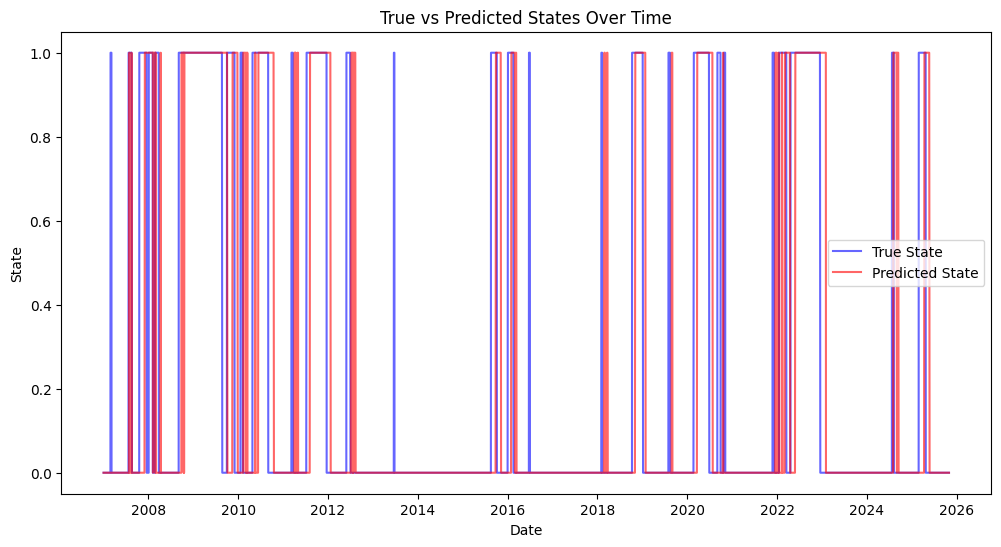

In [20]:
# create a plot of y_true, y_pred, dates for visual inspection
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(dates, y_true, label='True State', color='blue', alpha=0.6)
plt.plot(dates, y_pred, label='Predicted State', color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('State')
plt.title('True vs Predicted States Over Time')
plt.legend()
plt.show()

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2801: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2801: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2801: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A si

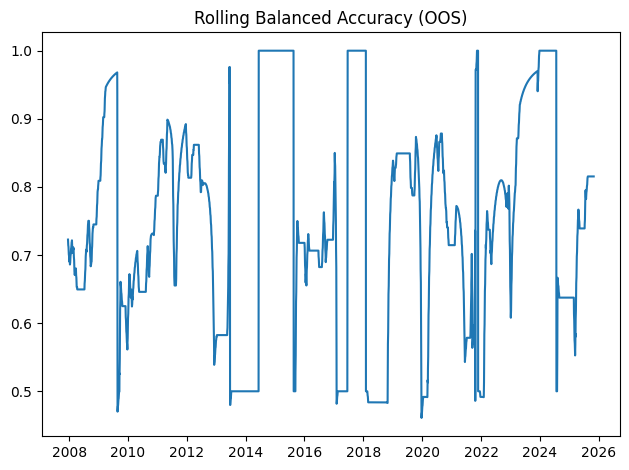

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score

s = pd.Series((y_true == y_pred).astype(int), index=dates)

# rolling balanced accuracy needs recomputing on a window, not just mean correctness
win = 252  # e.g., 1y of daily data
roll = []
roll_idx = []
for i in range(win, len(dates)+1):
    yt = y_true[i-win:i]
    yp = y_pred[i-win:i]
    roll.append(balanced_accuracy_score(yt, yp))
    roll_idx.append(dates[i-1])

roll = pd.Series(roll, index=roll_idx)

plt.figure()
plt.plot(roll.index, roll.values)
plt.title("Rolling Balanced Accuracy (OOS)")
plt.tight_layout()
plt.show()


In [23]:
import matplotlib.pyplot as plt
import numpy as np

p = price.loc[dates]  # align
correct = (y_true == y_pred)

plt.figure()
plt.plot(dates, p.values)

# mark incorrect points on price
plt.scatter(dates[~correct], p.values[~correct], marker="x")

plt.title("Price with Incorrect Predictions Marked")
plt.tight_layout()
plt.show()

# separate figure: predicted state over time as a step line (clean)
plt.figure()
plt.step(dates, y_pred, where="post")
plt.title("Predicted State Over Time (OOS)")
plt.tight_layout()
plt.show()


NameError: name 'price' is not defined

In [ ]:
import numpy as np
from sklearn.metrics import balanced_accuracy_score, f1_score, accuracy_score

def block_bootstrap_ci(y_true, y_pred, metric_fn, block_len=30, n_boot=1000, seed=0, alpha=0.05):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    n = len(y_true)
    if n == 0:
        return np.nan, (np.nan, np.nan)

    rng = np.random.default_rng(seed)

    # circular extension so blocks can wrap
    yt2 = np.concatenate([y_true, y_true[:block_len]])
    yp2 = np.concatenate([y_pred, y_pred[:block_len]])

    stats = np.empty(n_boot, dtype=float)

    n_blocks = int(np.ceil(n / block_len))

    for b in range(n_boot):
        starts = rng.integers(0, n, size=n_blocks)
        idx = np.concatenate([np.arange(s, s + block_len) for s in starts])[:n]
        stats[b] = metric_fn(yt2[idx], yp2[idx])

    point = metric_fn(y_true, y_pred)
    lo = np.quantile(stats, alpha/2)
    hi = np.quantile(stats, 1 - alpha/2)
    return point, (lo, hi)

# metric fns
def macro_f1(yt, yp): return f1_score(yt, yp, average="macro")
def bal_acc(yt, yp): return balanced_accuracy_score(yt, yp)
def acc(yt, yp): return accuracy_score(yt, yp)


In [ ]:
import pandas as pd

def yearly_metrics_with_ci(dates, y_true, y_pred, metric_fn, block_len=30, n_boot=1000, seed=0):
    dfm = pd.DataFrame({"y_true": y_true, "y_pred": y_pred}, index=pd.DatetimeIndex(dates))
    out = []
    for yr, g in dfm.groupby(dfm.index.year):
        point, (lo, hi) = block_bootstrap_ci(
            g["y_true"].to_numpy(), g["y_pred"].to_numpy(),
            metric_fn=metric_fn, block_len=block_len, n_boot=n_boot, seed=seed + int(yr)
        )
        out.append((yr, point, lo, hi, len(g)))
    return pd.DataFrame(out, columns=["year", "metric", "ci_lo", "ci_hi", "n"])
